# Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import random
from numpy.linalg import norm

In [2]:
data=pd.read_csv('Advertising Dataset.csv') #loading the data

In [3]:
data.head() #looking at the first five lines

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
data.corr() #correlation between features

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# Random spliting into Testing Datas and Training Datas

In [8]:
test=np.array(data)

In [9]:
test.shape

(200, 5)

In [10]:
random.seed(450)
train=[]

for i in range(150): #75% of 200 is 150
    n=random. randint(0,test.shape[0]-1) #generating random number
    train.append(test[n])
    test = np.delete(test,n, axis=0)
train=np.array(train)

In [11]:
train.shape

(150, 5)

In [12]:
np.unique(test[:,0]) #unnamed values of testing

array([  1.,   5.,   9.,  11.,  13.,  22.,  26.,  29.,  34.,  37.,  38.,
        43.,  47.,  52.,  53.,  54.,  55.,  56.,  60.,  64.,  71.,  72.,
        77.,  84.,  86.,  96., 104., 105., 106., 108., 110., 113., 114.,
       117., 119., 124., 130., 132., 137., 144., 151., 160., 161., 163.,
       164., 179., 183., 186., 193., 196.])

In [13]:
np.unique(train[:,0]) #unnamed values of training

array([  2.,   3.,   4.,   6.,   7.,   8.,  10.,  12.,  14.,  15.,  16.,
        17.,  18.,  19.,  20.,  21.,  23.,  24.,  25.,  27.,  28.,  30.,
        31.,  32.,  33.,  35.,  36.,  39.,  40.,  41.,  42.,  44.,  45.,
        46.,  48.,  49.,  50.,  51.,  57.,  58.,  59.,  61.,  62.,  63.,
        65.,  66.,  67.,  68.,  69.,  70.,  73.,  74.,  75.,  76.,  78.,
        79.,  80.,  81.,  82.,  83.,  85.,  87.,  88.,  89.,  90.,  91.,
        92.,  93.,  94.,  95.,  97.,  98.,  99., 100., 101., 102., 103.,
       107., 109., 111., 112., 115., 116., 118., 120., 121., 122., 123.,
       125., 126., 127., 128., 129., 131., 133., 134., 135., 136., 138.,
       139., 140., 141., 142., 143., 145., 146., 147., 148., 149., 150.,
       152., 153., 154., 155., 156., 157., 158., 159., 162., 165., 166.,
       167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177.,
       178., 180., 181., 182., 184., 185., 187., 188., 189., 190., 191.,
       192., 194., 195., 197., 198., 199., 200.])

# Using my linear regression

In [14]:
#deleting unnamed values

train=np.delete(train, 0, axis=1)
test=np.delete(test, 0, axis=1)

In [15]:
train_x=train[:,0:-1]
train_y=train[:,-1]
test_x=test[:,0:-1]
test_y=test[:,-1]

In [16]:
train_y=np.expand_dims(train_y, axis=1)
test_y=np.expand_dims(test_y, axis=1)

In [17]:
x_mean=np.mean(train_x,axis=0)
y_mean=np.mean(train_y,axis=0)
inv_term=np.dot((train_x-x_mean).transpose(),(train_x-x_mean))
inv_term=np.linalg.inv(inv_term)
second_term=np.dot((train_x-x_mean).transpose(),(train_y-y_mean))
w=np.dot(inv_term,second_term)
b=y_mean-np.dot(w.transpose(),x_mean)

In [18]:
w

array([[ 0.04808006],
       [ 0.18526675],
       [-0.00246746]])

In [19]:
b

array([2.63769594])

# Result from Linear Regression from sklearn library

In [20]:
reg = LinearRegression().fit(train_x, train_y)

In [21]:
reg.intercept_ #100% match

array([2.63769594])

In [22]:
reg.coef_ #100% match

array([[ 0.04808006,  0.18526675, -0.00246746]])

# MSE on Test Set

In [23]:
y_pred=w[0]*test_x[:,0]+w[1]*test_x[:,1]+w[2]*test_x[:,2]+b

y_pred=np.expand_dims(y_pred, axis=1)

In [24]:
MSE=np.square(test_y-y_pred).mean()

In [25]:
MSE #using my algorithm

2.7955123966718123

In [26]:
Y = reg.predict(test_x)

In [27]:
MSE = np.square(test_y-Y).mean()

In [28]:
MSE #using SKLEARN

2.7955123966718087

# Ridge Regression

In [29]:
l_w1=[]
l_w2=[]
l_w3=[]

l_b=[]
l_MSE=[]

lamb=[]
l2_norm=[]

for i in [0.5, 1, 5, 10, 50, 100,200,400,600,800,1000]:
    
    l=i
    
    lamb.append(l)
    x_mean=np.mean(train_x,axis=0)
    y_mean=np.mean(train_y,axis=0)
    
    inv_term=np.dot((train_x-x_mean).transpose(),(train_x-x_mean))+l*np.identity(3, dtype = float)
    inv_term=np.linalg.inv(inv_term)
    
    second_term=np.dot((train_x-x_mean).transpose(),(train_y-y_mean))
    
    w=np.dot(inv_term,second_term)
    b=y_mean-np.dot(w.transpose(),x_mean)
    
    l_w1.append(w[0].tolist())
    l_w2.append(w[1].tolist())
    l_w3.append(w[2].tolist())
    l_b.append(b)
    
    l2_norm.append(norm(w))
    
    y_pred=w[0]*test_x[:,0]+w[1]*test_x[:,1]+w[2]*test_x[:,2]+b
    y_pred=np.expand_dims(y_pred, axis=1)
    
    MSE=np.square(test_y-y_pred).mean()
    l_MSE.append(MSE)


# Plotting graphs

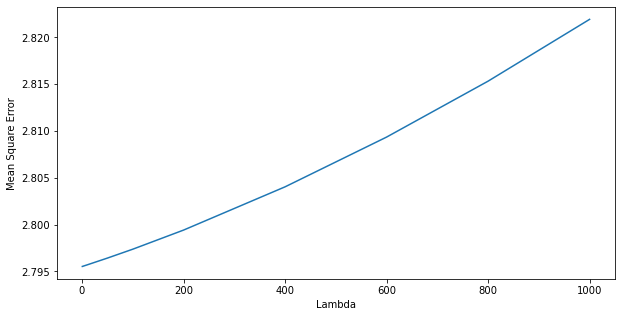

In [30]:
plt.figure(figsize=(10,5))

plt. plot(lamb, l_MSE, label = "MSE")

plt. xlabel('Lambda')

plt. ylabel('Mean Square Error')

plt.show()

In [31]:
q=[]
y=[]
z=[]

for i in l_w1:
    q.append(i[0])
    
for j in l_w2:
    y.append(j[0])
    
for k in l_w3:
    z.append(k[0])
    
q=tuple(q)
y=tuple(y)
z=tuple(z)

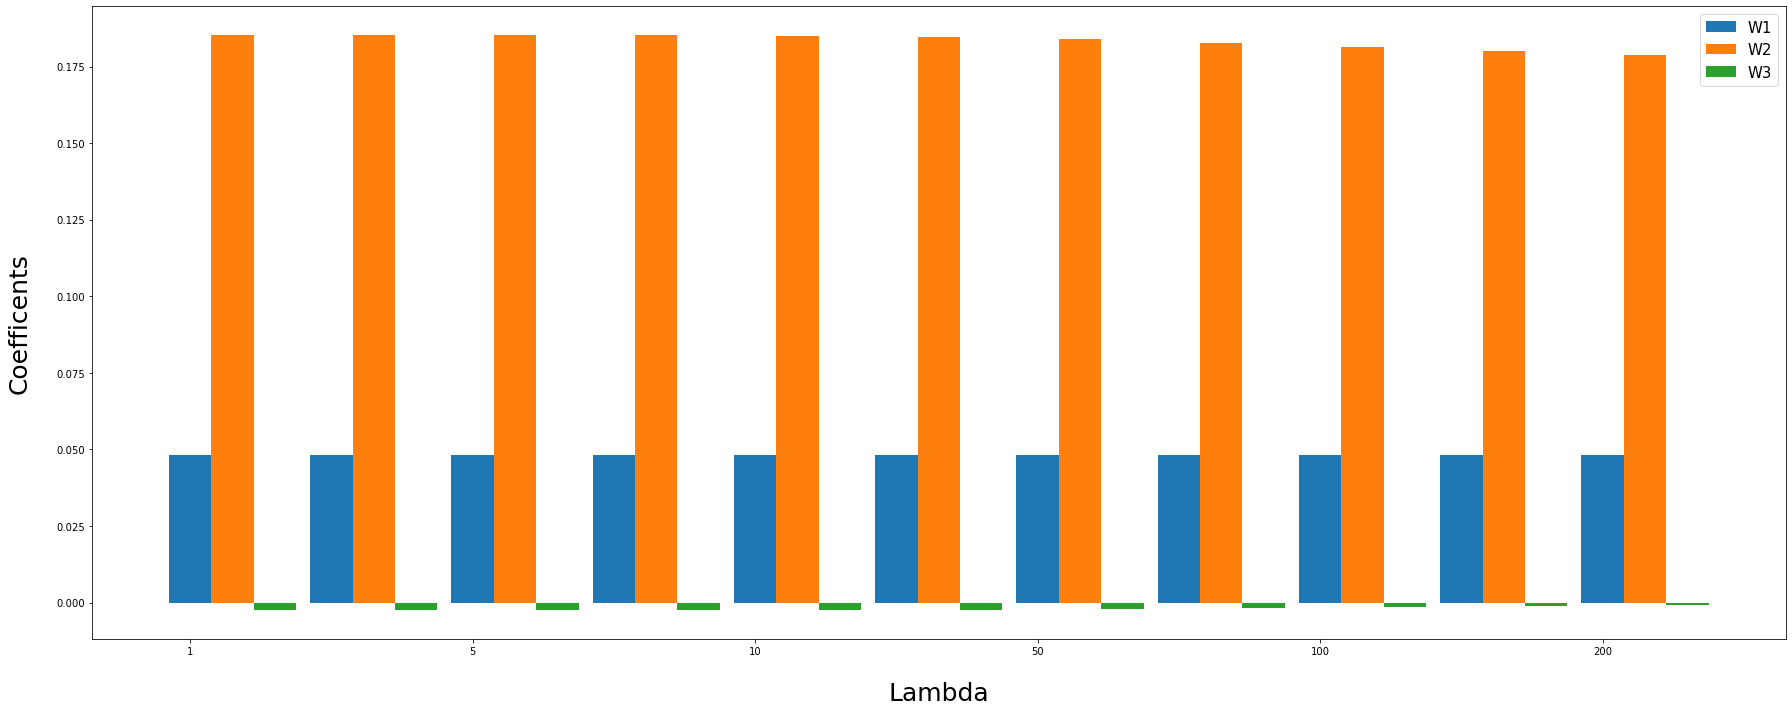

In [32]:
fig, ax = plt.subplots(figsize=(25, 10))

x = np.arange(len(l_w1))

bar_width = 0.3

b1 = ax.bar(x, q,width=bar_width,label='W1')
b2 = ax.bar(x + bar_width, y,width=bar_width,label='W2')
b2 = ax.bar(x + 2*bar_width, z,width=bar_width,label='W3')

ax.set_xticklabels(lamb)
ax.set_xlabel('Lambda', labelpad=25,fontsize=25)
ax.set_ylabel('Coefficents', labelpad=25,fontsize=25)

fig.tight_layout()

ax.legend(fontsize=15)

plt.show()

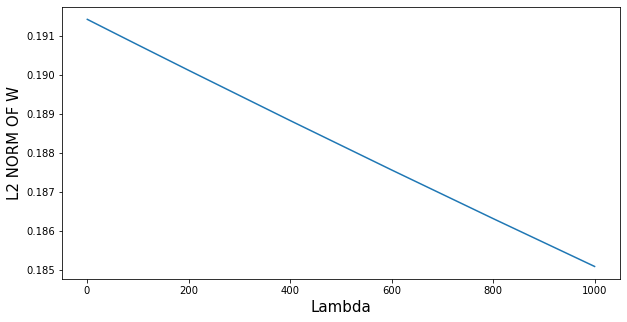

In [33]:
plt.figure(figsize=(10,5))

plt.plot(lamb,l2_norm)

plt. xlabel('Lambda',fontsize=15)
plt. ylabel('L2 NORM OF W',fontsize=15)

plt.show()

# Lasso Regression

In [34]:
coeff = []
lamb=[]

for j in range(1,1000):
    
    l = j/10
    
    lamb.append(l)
    
    clf = linear_model.Lasso(alpha=l)
    clf.fit(train_x,train_y)
    
    if (clf.coef_[0]==0 and clf.coef_[1]==0) or (clf.coef_[1]==0 and clf.coef_[2]==0) or (clf.coef_[0]==0 and clf.coef_[2]==0):
        
        print(clf.coef_)
        coeff.append(clf.coef_)
        break
    
    coeff.append(clf.coef_)

[0.04328307 0.         0.        ]


In [35]:
coeff = np.array(coeff)

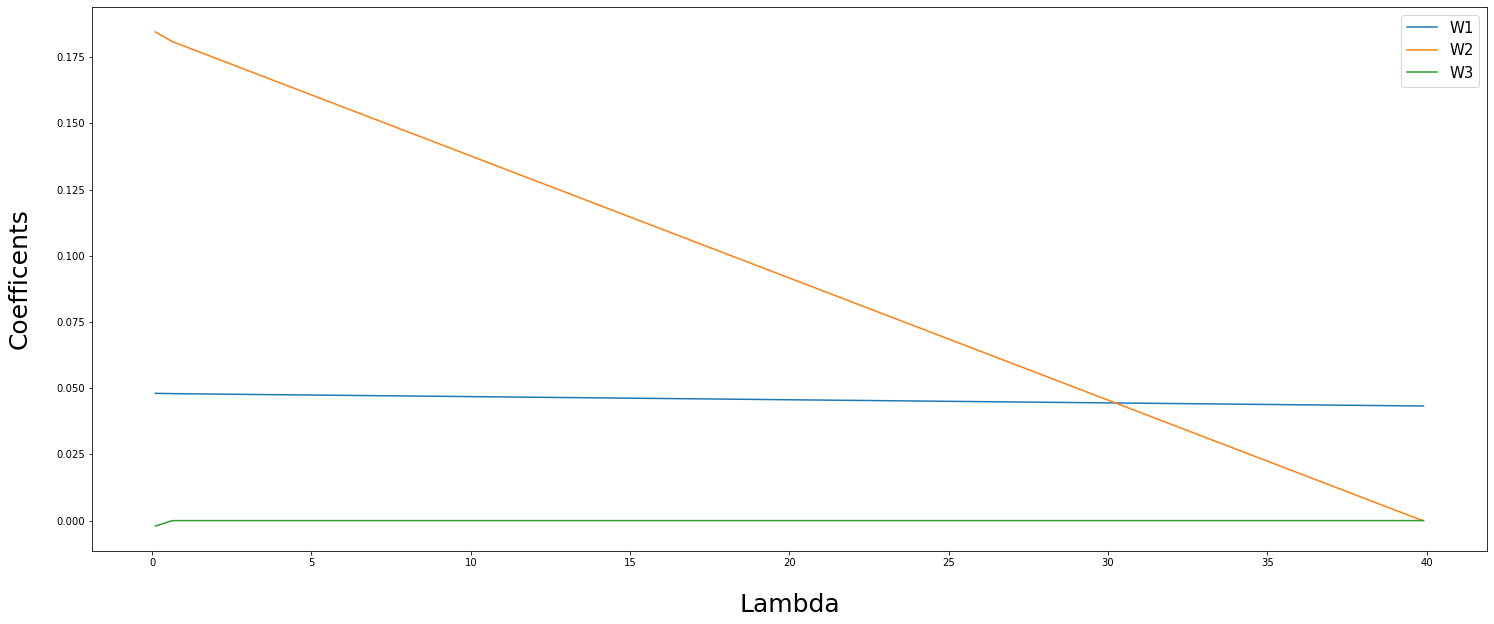

In [36]:
fig, ax = plt.subplots(figsize=(25, 10))

plt.plot(lamb,coeff[:,0],label='W1')
plt.plot(lamb,coeff[:,1],label='W2')
plt.plot(lamb,coeff[:,2],label='W3')

ax.set_xlabel('Lambda', labelpad=25,fontsize=25)
ax.set_ylabel('Coefficents', labelpad=25,fontsize=25)

ax.legend(fontsize = 15)

plt.show()

W1 is most far from 0, therefore TV is most important feature. We can also see this from the correlation chart as TV has the highest correlation with the target.